In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [16]:
DATADIR = "training" #Onde estão sendo armazenados os arquivos
CATEGORIES = ["A","B"] #Possibilidades de estudo

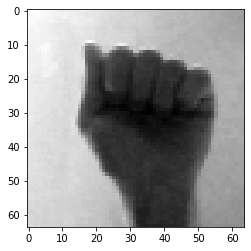

In [20]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) # Caminho com os diretórios das letras
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #Cada imagem também é convertida na escala de cinza
        # plt.imshow(img_array, cmap="gray") #OPCIONAL: Plotando imagens na escala de cinza
        # plt.show()
        break
    break

In [22]:
print(img_array.shape) #Verificando o tamanho da matriz da imagem (64x64)

(64, 64)


In [25]:
IMG_SIZE = 64

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
# plt.imshow(img_array, cmap="gray") #OPCIONAL: Plotando imagens na escala de cinza
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "training" #Onde estão sendo armazenados os arquivos
CATEGORIES = ["A","B"] #Possibilidades de estudo

In [28]:
training_data = []
IMG_SIZE = 64

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) # Caminho com os diretórios das letras
        class_num = CATEGORIES.index(category) # Dando um número para a categoria
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #Cada imagem também é convertida na escala de cinza
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) #Redimensionando a imagem
                training_data.append([new_array,class_num]) #Inserindo a imagem e sua classificação
            except Exception as e: #Erro que pode ocorrer ao importar imagens
                pass

create_training_data()


In [29]:
print(len(training_data)) #Quantidade de dados verificados no dataset

3348


In [31]:
import random
random.shuffle(training_data) #Embaralhando os dados que a rede vai usar para treinar

In [32]:
for sample in training_data[:10]:
    print(sample[1])



0
0
0
1
1
1
0
1
0
1


In [33]:
X = [] # Features
y = [] # Labels

In [34]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # -1: Quantas features tem, IMG_SIZE x IMG_SIZE: tamanho da imagem, 1: indica que o canal de cores é só o cinza (3 se RGB)
